In [ ]:
!pip install numpy==1.22.3
!pip install node2vec==0.4.4
!pip install Gensim
!pip install hazm
!pip install farsi-tools
!pip install torch-geometric==2.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.22.3 which is incompatible.
distrax 0.1.5 requires numpy>=1.23.0, but you have numpy 1.22.3 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.22.3 which is incompatible.
pywavelets 1.6.0 requires numpy<3,>=1.22.4, but you have numpy 1.22.3 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 329.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 22.0 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=860dacb21b91d1a2fdd416fc80ea8c1aba485dbd35943600e39d13d727420853
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: nump

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 966.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26306 sha256=da31fc33b2635fbebee2acf45c816efc5f97a457530e10b42854a18f991cea7d
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616579 sha256=2b775ac58c88799760d9c8df6b7b0897e8f8f734fb3799f46193669c8f915587
  Stored in directory: /root/.cache/pip/wheels/75/0f/9d/84a397fb5e2761b2219529d8f8cc5a29252f08deda19ce51f3
Successfully built torch-geometric


## section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: load pandas file from google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/original_dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/original_dataset.csv'

In [ ]:
df=pd.read_csv('original_dataset.csv')

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import unicode_literals
import re
import regex
from farsi_tools import *
from hazm import *
import networkx as nx

In [ ]:
import pandas as pd
df=pd.read_csv('/content/original_dataset.csv')


In [ ]:
df

,date_year,date_month,date_month.1,comment,rate,bookID,like,lable
0,1395,11,11,اسم کتاب No one writes to the Colonel\nترجمش...,0.0,3.0,2.0,0.0
1,1395,11,11,"طاقچه عزیز،نام کتاب""کسی به سرهنگ نامه نمینویسد...",5.0,3.0,2.0,1.0
2,1394,6,6,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,5.0,3.0,0.0,1.0
3,1393,9,9,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,2.0,3.0,0.0,0.0
4,1393,4,4,کتابی شیوا و بینظیر یکی دیگر از شاهکار های اقا...,5.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...
62682,1398,6,6,من چاپیش رو خوندم خیلی هم لذت بردم.به نظرم موض...,5.0,59636.0,3.0,1.0
62683,1398,6,6,کاش یه تخفیف میذاشتن . خیلی دوست دارم بخونمش,5.0,59638.0,2.0,1.0
62684,1398,5,5,این کتاب داستان درد و رنج کشاورزان بیکارشده‌ی ...,5.0,59645.0,9.0,1.0
62685,1398,9,9,کتابی فوق العاده زیبا و عالی,5.0,59646.0,0.0,1.0


In [ ]:
df.isnull().sum()

date_year       0
date_month      0
date_month.1    0
comment         0
rate            0
bookID          0
like            0
lable           0
dtype: int64

In [ ]:
df1 = df.dropna(subset=['comment']).reset_index()

In [ ]:
df.date_month.value_counts()

date_month
9     275
8     213
10    208
7     201
2     192
6     189
11    186
5     162
1     141
4     139
3     125
12    101
Name: count, dtype: int64

In [ ]:
df.date_year.value_counts()

date_year
1398    800
1397    540
1396    350
1395    335
1394    105
1393      2
Name: count, dtype: int64

In [ ]:
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [ ]:
from hazm import Normalizer, word_tokenize, sent_tokenize
normalizer = Normalizer()
from farsi_tools import *

In [ ]:
farsi_stop_words=stop_words()
from hazm import Normalizer, word_tokenize, sent_tokenize
normalizer = Normalizer()


In [ ]:
farsi_stop_words

['!',
 '"',
 '#',
 ',',
 '-',
 '/',
 ':',
 '«',
 '»',
 '،',
 '؛',
 '؟',
 '۰',
 '۱',
 '۲',
 '۳',
 '۴',
 '۵',
 '۶',
 '۷',
 '۸',
 '۹',
 '…',
 '$',
 '!',
 ',',
 ':',
 ';',
 '،',
 '؛',
 '؟',
 'آباد',
 'آره',
 'آری',
 'آمد',
 'آمده',
 'آن',
 'آنان',
 'آنجا',
 'آنطور',
 'آنقدر',
 'آنکه',
 'آنها',
 'آنچه',
 'آنکه',
 'آورد',
 'آورده',
 'آید',
 'آی',
 'آیا',
 'آیند',
 'اتفاقا',
 'اثر',
 'احتراما',
 'احتمالا',
 'اخیر',
 'اری',
 'از',
 'ازجمله',
 'اساسا',
 'است',
 'استفاد',
 'استفاده',
 'اش',
 'اشکارا',
 'اصلا',
 'اصولا',
 'اعلام',
 'اغلب',
 'اکنون',
 'الان',
 'البته',
 'البتّه',
 'ام',
 'اما',
 'امروز',
 'امروزه',
 'امسال',
 'امشب',
 'امور',
 'ان',
 'انجام',
 'اند',
 'انشاالله',
 'انصافا',
 'انطور',
 'انقدر',
 'انها',
 'انچنان',
 'انکه',
 'انگار',
 'او',
 'اول',
 'اولا',
 'ای',
 'ایشان',
 'ایم',
 'این',
 'اینکه',
 'اکثرا',
 'اکنون',
 'اگر',
 'ای',
 'ایا',
 'اید',
 'ایشان',
 'ایم',
 'این',
 'اینجا',
 'ایند',
 'اینطور',
 'اینقدر',
 'اینها',
 'اینچنین',
 'اینک',
 'اینکه',
 'اینگونه',
 'با',
 'بار',


In [ ]:
preprocessed_comments = []
for comment in df.comment:
    # Normalize comment text
    comment = normalizer.normalize(comment)
    f_m = emoji_pattern.sub(r'', comment)

    # Tokenize sentences
    words = word_tokenize(f_m)

    # Tokenize words and remove stopwords
    words = [word_tokenize(word) for word in words]
    words = [' '.join(w) for w in words]
    tokens_without_sw = [word for word in words if word not in farsi_stop_words]

    # Add preprocessed comment to the list
    preprocessed_comments.append(' '.join(tokens_without_sw))

preprocessed_comments[3]

```
# This is formatted as code
```



In [ ]:
preprocessed_comments[3]

'نظر کتاب خوبی میومد ترجمش خوشم نیومد لحنش طوری کتابو بخونم'

In [ ]:
df.comment=preprocessed_comments

In [ ]:
df

,date_year,date_month,date_month.1,comment,rate,bookID,like,lable
0,1395,11,11,اسم کتاب No one writes to the Colonel ترجمش سر...,0.0,3.0,2.0,0.0
1,1395,11,11,طاقچه عزیز کتاب سرهنگ نامه نمی‌نویسد متن اشتبا...,5.0,3.0,2.0,1.0
2,1394,6,6,بنظرم مارکز سال تنهایی بخاطرش نوبل ادبیات زیبا...,5.0,3.0,0.0,1.0
3,1393,9,9,نظر کتاب خوبی میومد ترجمش خوشم نیومد لحنش طوری...,2.0,3.0,0.0,0.0
4,1393,4,4,کتابی شیوا بینظیر شاهکار‌های اقای مارکز,5.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...
62682,1398,6,6,چاپیش خوندم لذت بردم . نظرم موضوعش تکراری لوس ...,5.0,59636.0,3.0,1.0
62683,1398,6,6,تخفیف میذاشتن . دوست بخونمش,5.0,59638.0,2.0,1.0
62684,1398,5,5,کتاب داستان درد رنج کشاورزان بیکارشده‌ی آمریکا...,5.0,59645.0,9.0,1.0
62685,1398,9,9,کتابی فوق‌العاده زیبا عالی,5.0,59646.0,0.0,1.0


In [ ]:
df.to_csv('dataset_taghchex.csv', index=False)

In [ ]:
df.isnull().sum()

date_year       0
date_month      0
date_month.1    0
comment         0
rate            0
bookID          0
like            0
lable           0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# محاسبه ماتریس TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df.comment)

In [ ]:
tfidf_matrix=tfidf_matrix .toarray()

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix, columns=['tfidf_feature_{}'.format(i) for i in range(tfidf_matrix.shape[1])])

In [ ]:
tfidf_df.describe()

,tfidf_feature_0,tfidf_feature_1,tfidf_feature_2,tfidf_feature_3,tfidf_feature_4,tfidf_feature_5,tfidf_feature_6,tfidf_feature_7,tfidf_feature_8,tfidf_feature_9,...,tfidf_feature_61141,tfidf_feature_61142,tfidf_feature_61143,tfidf_feature_61144,tfidf_feature_61145,tfidf_feature_61146,tfidf_feature_61147,tfidf_feature_61148,tfidf_feature_61149,tfidf_feature_61150
count,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,62687.000000,...,62687.000000,6.268700e+04,62687.000000,62687.000000,6.268700e+04,62687.000000,6.268700e+04,62687.000000,62687.000000,62687.000000
mean,0.000032,0.000008,0.000040,0.000021,0.000024,0.000024,0.000008,0.000003,0.000003,0.000005,...,0.000002,8.184956e-07,0.000002,0.000002,5.808625e-07,0.000004,9.723697e-07,0.000004,0.000013,0.000003
std,0.003710,0.001172,0.004325,0.003244,0.002455,0.002667,0.001249,0.000652,0.000576,0.000933,...,0.000421,2.049298e-04,0.000410,0.000279,1.454327e-04,0.000984,2.434558e-04,0.000987,0.001812,0.000677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,0.562418,0.221640,0.658929,0.728903,0.427066,0.533382,0.222278,0.163332,0.104343,0.184473,...,0.105309,5.130904e-02,0.102618,0.060445,3.641252e-02,0.246459,6.095494e-02,0.247098,0.407677,0.158438


In [ ]:
tfidf_matrix.shape

(62687, 61151)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# محاسبه ماتریس شباهت
similarity_matrix = cosine_similarity(tfidf_matrix)

# نمایش ماتریس شباهتa
#print(similarity_matrix)

In [ ]:
similarity_matrix.shape

(62687, 62687)

In [ ]:
n=len(df)

g = nx.Graph()

for i in range(0, n):
  g.add_node(i, date_year=df.date_year[i], date_month=df.date_year[i],comment=df.comment[i],
  bookID=df.bookID[i], like=df.like[i],lable=df.lable[i])

print('number of nodes =', g.number_of_nodes())

number of nodes = 62687


In [ ]:
min_year=df.date_year.min()      #find max date of comments(min age ) ==>  year=1398 month=9
min_month=df[df.date_year==min_year].date_month.min()
print(min_year)
print(min_month)

1392
8


In [ ]:
max_year=df.date_year.max()      #find max date of comments(min age ) ==>  year=1398 month=9
max_age=df[df.date_year==max_year].date_month.max()/12+max_year
max_age

1398.8333333333333

In [ ]:
a=(1393+8/12)
a

1393.6666666666667

In [ ]:
df

In [ ]:
s=5  # The number of likes is almost the same
x=10   #Semantic similarity rate
a=10  #Coefficient of bookID
c=10   #Coefficient of like
f=np.zeros((n, n))
A=pd.DataFrame(f)
for i in range(0, n):
  for j in range(i + 1, n):
    like_=abs(g.nodes[i]['like'] - g.nodes[j]['like'])
    age_i=max_age-(g.nodes[i]['date_year'] + g.nodes[i]['date_month']/12)
    age_j=max_age-(g.nodes[j]['date_year'] + g.nodes[j]['date_month']/12)
    diff_age=abs(age_i-age_j)
    if diff_age <=0.5:
      A[i][j]+=10
      A[j][i]+=10
    elif (0.5 <diff_age <=1):
      A[i][j]+=9
      A[j][i]+=9
    elif (1 <diff_age <=1.5):
      A[i][j]+=8
      A[j][i]+=8
    elif (1.5 <diff_age <=2):
      A[i][j]+=7
      A[j][i]+=7
    elif (2 <diff_age <=2.5):
      A[i][j]+=6
      A[j][i]+=6
    elif (2.5 <diff_age <=3):
      A[i][j]+=5
      A[j][i]+=5
    elif (3 <diff_age <=3.5):
      A[i][j]+=4
      A[j][i]+=4
    elif (3.5 <diff_age <=4):
      A[i][j]+=3
      A[j][i]+=3
    elif (4.5 <diff_age <5.1):
      A[i][j]+=2
      A[j][i]+=2
    #rate_=abs(g.nodes[i]['rate'] - g.nodes[j]['rate'])
    if similarity_matrix[i][j] > 0.6:
      A[i][j]+=x
      A[j][i]+=x
    if g.nodes[i]['bookID'] == g.nodes[j]['bookID']:
      A[i][j]+=a
      A[j][i]+=a


    if like_<=s:
      A[i][j]+=c
      A[j][i]+=c


    """if A[i][j]>12:
      g.add_edge(i, j)"""


#nx.draw(g)
print(g.edges)

KeyboardInterrupt: 

In [ ]:
g.edges

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_mm=mm.fit_transform(A)
X_mm

In [ ]:
X_mm

array([[0.        , 0.8       , 0.8       , ..., 0.46666667, 0.46666667,
        0.46666667],
       [0.8       , 0.        , 1.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.8       , 1.        , 0.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       ...,
       [0.46666667, 0.66666667, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.46666667, 0.66666667, 0.66666667, ..., 1.        , 0.        ,
        1.        ],
       [0.46666667, 0.66666667, 0.66666667, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
A=pd.DataFrame(X_mm)

NameError: name 'pd' is not defined

In [ ]:
for i in range(0, n):
  for j in range(i + 1, n):
    if g.has_edge(i,j):
      g.remove_edge(i, j)
print(g.edges)

NameError: name 'n' is not defined

In [ ]:
for i in range(0, n):
  for j in range(i + 1, n):
        if A[i][j]>0.65:
          g.add_edge(i, j,weight=A[i][j])
print(g.edges)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for i in range(0, n):
  for j in range(i + 1, n):
        if A[i][j]>0.65:
          g.add_edge(i, j)
print(g.edges)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(g.number_of_nodes())
print(g.number_of_edges())

2132
462892


In [ ]:
,weight='weight'

In [ ]:
# Calculate the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(g).todense()

# Convert the matrix to a DataFrame for easier visualization
adjacency_df = pd.DataFrame(adjacency_matrix, index=df.index, columns=df.index)

# Display the adjacency matrix
print(adjacency_df)

<ipython-input-62-ab9d9b3076ac>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(g).todense()


      0     1     2     3     4     5     6     7     8     9     ...  2122  \
0        0     1     1     0     0     1     0     0     1     1  ...     0   
1        1     0     1     1     0     1     1     1     1     1  ...     0   
2        1     1     0     1     1     1     1     1     1     1  ...     0   
3        0     1     1     0     1     0     1     1     1     1  ...     0   
4        0     0     1     1     0     0     1     1     1     1  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2127     0     0     1     0     0     0     0     0     0     1  ...     1   
2128     0     1     1     0     0     0     0     0     0     1  ...     1   
2129     0     1     1     0     0     0     0     0     0     1  ...     1   
2130     0     1     1     0     0     0     0     0     0     1  ...     1   
2131     0     1     1     0     0     0     0     0     0     1  ...     1   

      2123  2124  2125  2126  2127  2128  2129  213

In [ ]:
import numpy as np


In [ ]:
np.save('adjacency_matrix.npy', adjacency_matrix)

In [ ]:
adjacency_matrix = np.load('/content/drive/MyDrive/adjacency_matrix.npy')

## GNN

In [ ]:
!pip install torch-geometric

In [ ]:
!pip install torch-sparse

  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=2771734 sha256=4cf3b63b8ac42779cbbe97f1f490fe257eb6aef900fb96507a56c70f45fcdcd3
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse


In [ ]:
!pip install torch-scatter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=3594771 sha256=94e1bbcb062662d471b33ac1fc55332c6777e1e36306c9d769ce00552630cea3
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter


In [ ]:
import torch
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader

labels = df['lable'].astype(int).tolist()

# Create a PyTorch Geometric graph data
edge_index = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)
x = torch.tensor(tfidf_matrix, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

# Define a simple GNN model
import torch.nn.functional as F

class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.dropout(x)  # Apply dropout after the first layer
        x = self.conv2(x, edge_index)
        return x

# Initialize the GNN model
input_dim = tfidf_matrix.shape[1]  # Number of features in the TF-IDF matrix
hidden_dim = 64  # You can change this as per your requirements
output_dim = 2  # Number of classes, change it based on your actual classes
dropout_prob = 0.1  # You can adjust the dropout probability


model = GNNModel(input_dim, hidden_dim, output_dim, dropout_prob)
# Define the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the GNN model
def train(model, data, optimizer, criterion, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

# Calculate the number of nodes for the training and test sets
total_nodes = len(labels)
train_ratio = 0.75  # Desired train ratio
train_size = int(total_nodes * train_ratio)
test_size = total_nodes - train_size

# Set train/test mask
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.train_mask[:train_size] = 1
data.test_mask = ~data.train_mask

# Train the model
train(model, data, optimizer, criterion, num_epochs=200)

# Test the model
model.eval()
out = model(data.x, data.edge_index)
_, predicted_labels = torch.max(out[data.test_mask], dim=1)

# Convert the predicted_labels to a list
predicted_labels = predicted_labels.tolist()



In [ ]:
print("Number of nodes in the training set:", data.train_mask.sum().item())
print("Number of nodes in the test set:", data.test_mask.sum().item())


Number of nodes in the training set: 1599
Number of nodes in the test set: 533


In [ ]:
# Test Accuracy
correct = sum([1 for i, j in zip(labels[train_size:], predicted_labels) if i == j])
total = test_size
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8612


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.8612
Recall: 1.0000
F1-Score: 0.9254


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

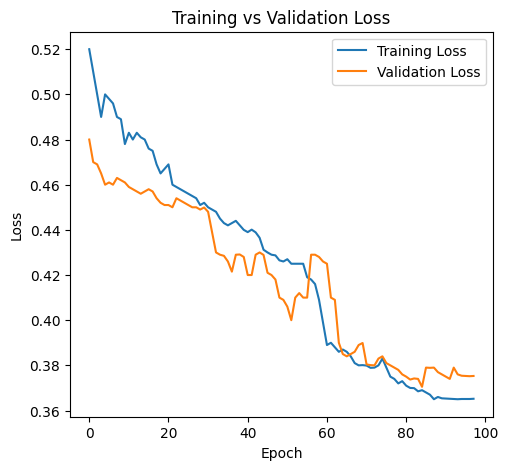

In [ ]:
# Plot the training and validation losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(adjusted_val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt

In [ ]:
model.eval()
with torch.no_grad():
    # Forward pass to get logits
    logits = model(data.x, data.edge_index)
    # Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(logits[data.test_mask], dim=1)[:, 1].cpu().numpy()


In [ ]:
from sklearn.metrics import roc_curve, auc

# True labels
true_labels = data.y[data.test_mask].cpu().numpy()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
roc_auc = auc(fpr, tpr)


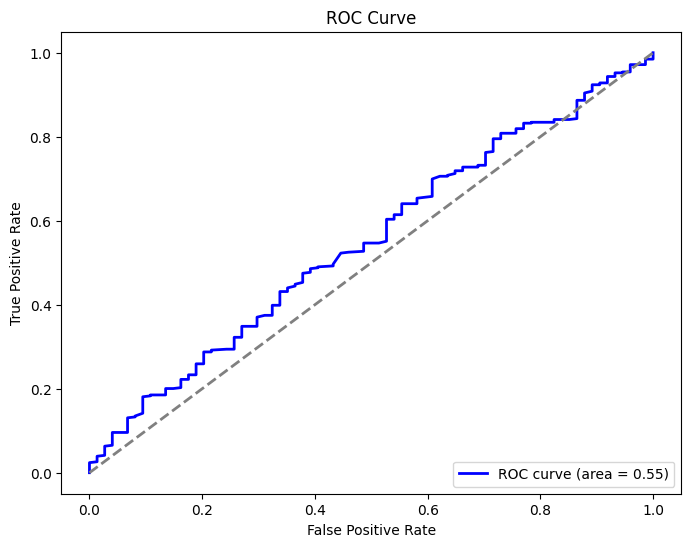

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
